# Settign up

## Conexión a google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd ./drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

## Instalar microTC

In [ ]:
%pip install git+https://github.com/felipeRmBr/microtc.git#egg=microtc

## Importar módulos *_utils

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from my_utils import dataset_utils
from my_utils import eval_utils
from my_utils import svc_utils
from my_utils import results_utils

import pickle

## Importar el dataset

In [ ]:
X_train, Y_train = dataset_utils.importTrainDataForSVM()

# Experiments

### TextModels variations

In [ ]:
from itertools import product

In [ ]:
# The focus of these experiments will be on choosing
# a weighting scheme and the types of kernel that will be used 
# in the experiments ahead

tokens_combos = [[-1,3],
                 [-1, 3, 6],
                 [-2, -1, 3, 7],
                 [-2, -1, 3, 5, 7],
                 [-3, -2, -1, 3, 7]]

text_model_params = {'num_option':['group'],
                     'usr_option':['group'],
                     'url_option':['group'],
                     'hashtag_option':['group'],
                     'del_punc':[True],
                     'del_dup':[True],
                     'del_diac':[True],
                     'token_list': tokens_combos,
                     'weighting':['tf', 'tfidf']
                     }

text_model_search_space = list(product(*text_model_params.values()))
print(len(text_model_search_space), ' combinations')

10  combinations


### SVM variations

In [ ]:
svm_params = {'kernel':['linear', 'rbf','sigmoid'],
              'C':[0.5,1,2,4]}

svm_search_space = list(product(*svm_params.values()))
print(len(svm_search_space), ' combinations')           

12  combinations


### Scanning

In [ ]:
df = svc_utils.svcSpaceScanner(X_train, Y_train,
                    'HS',
                    text_model_search_space,
                    list(text_model_params.keys()),
                    svm_search_space,
                    list(svm_params.keys()),
                    n_folds=7,
                    metrics=['acc'],
                    partial_CV=True,
                    backup_file='./Results/SVC/pase-1/HS.df')

In [ ]:
df = svc_utils.svcSpaceScanner(X_train, Y_train,
                    'HTA',
                    text_model_search_space,
                    list(text_model_params.keys()),
                    svm_search_space,
                    list(svm_params.keys()),
                    n_folds=7,
                    metrics=['acc'],
                    partial_CV=True,
                    backup_file='./Results/SVC/pase-1/HTA.df')

# Resultados

## HS

In [ ]:
import pickle
with open('./Results/SVC/pase-1/HS.df', 'rb') as file_handler:
  results_df = pickle.load(file_handler)

In [ ]:
results_df.head()

### Resultados por método de ponderación

### Resultados por tipo de kernel

In [ ]:
# ** for this we only consider those configurations where weighting='tfidf'
results_subset = results_df.loc[results_df['weighting']=='tfidf']

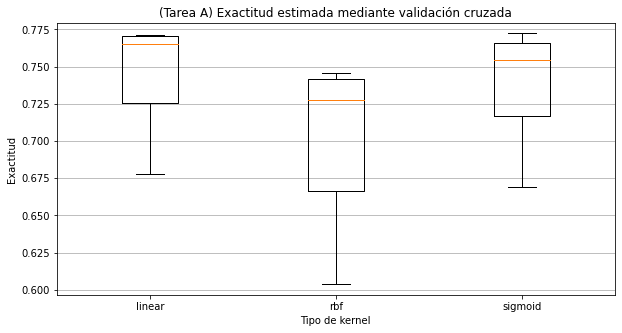

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'kernel':['linear','rbf','sigmoid']},
                        params2plot=['kernel'],
                        size=[10,5],
                        title="(Tarea A) Exactitud estimada mediante validación cruzada",
                        x_label="Tipo de kernel",
                        y_label="Exactitud")

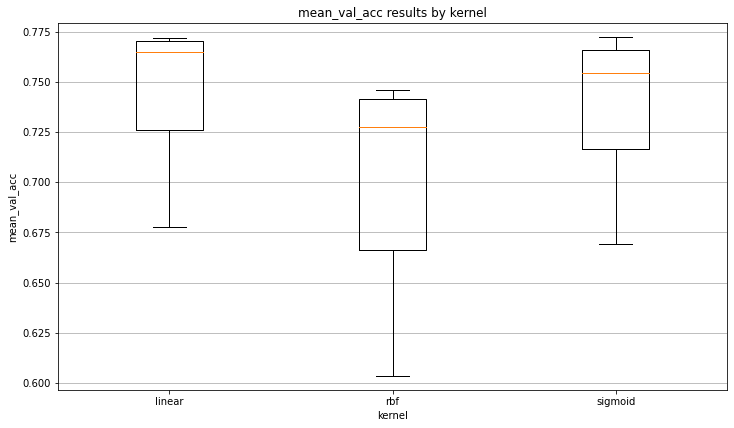

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'kernel':['linear','rbf','sigmoid']},
                                      params2plot=['kernel'])

### Resultados por factor de penalización

** for this we only consider those configurations where weighting='tfidf'

In [ ]:
results_subset = results_df.loc[results_df['weighting']=='tfidf']

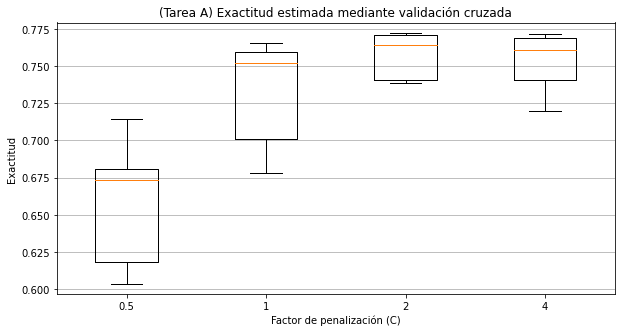

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'C':[0.5,1,2,4]},
                        params2plot=['C'],
                        size=[10,5],
                        title="(Tarea A) Exactitud estimada mediante validación cruzada",
                        x_label="Factor de penalización (C)",
                        y_label="Exactitud")

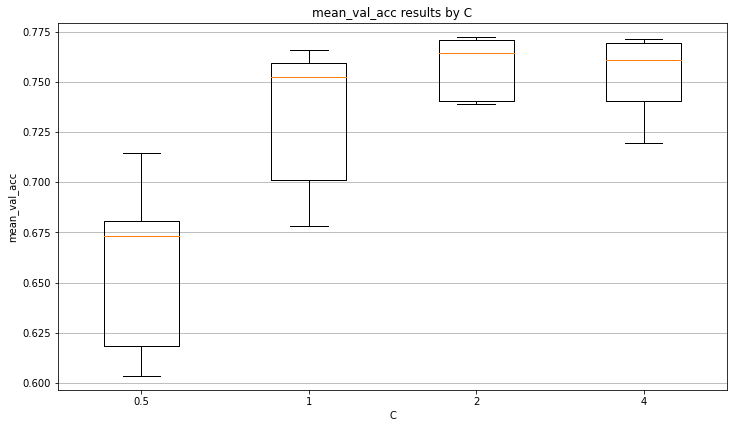

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'C':[0.5,1,2,4]},
                                      params2plot=['C'])

### Resumen de los resultados (HS)

* Método de ponderación: TFIDF
* Tipo de kernel: ['linear', 'sigmoid']
* Parámetro de penalización: [1, **2, 4**]

## HTA

In [ ]:
import pickle
with open('./Results/SVC/phase-1/HTA.df', 'rb') as file_handler:
  results_df = pickle.load(file_handler)

In [ ]:
results_df.head()

### Resultados por método de ponderación

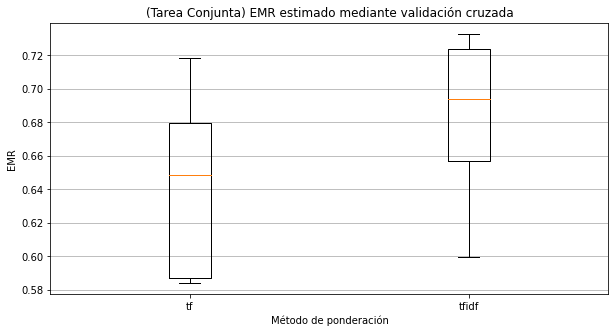

In [ ]:
plotResultsByParameter1(results_df, 
                        params_dict={'weighting':['tf', 'tfidf']},
                        params2plot=['weighting'],
                        size=[10,5],
                        title="(Tarea Conjunta) EMR estimado mediante validación cruzada",
                        x_label="Método de ponderación",
                        y_label="EMR")

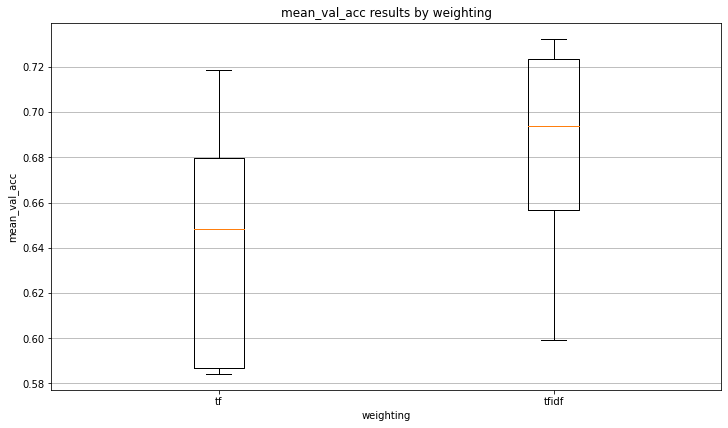

In [ ]:
results_utils.plotResultsByParameter1(results_df, 
                                      params_dict={'weighting':['tf', 'tfidf']},
                                      params2plot=['weighting'])

### Resultados por tipo de kernel

** for this we only consider those configurations where weighting='tfidf'

In [ ]:
results_subset = results_df.loc[results_df['weighting']=='tfidf']

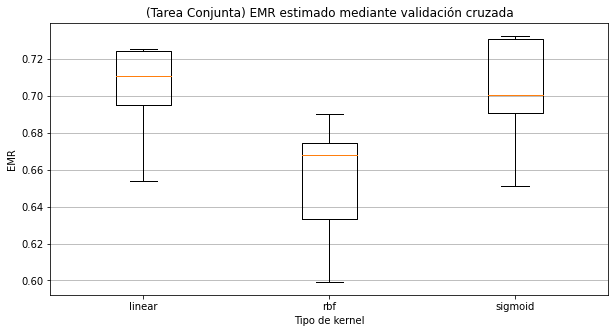

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'kernel':['linear','rbf','sigmoid']},
                        params2plot=['kernel'],
                        size=[10,5],
                        title="(Tarea Conjunta) EMR estimado mediante validación cruzada",
                        x_label="Tipo de kernel",
                        y_label="EMR")

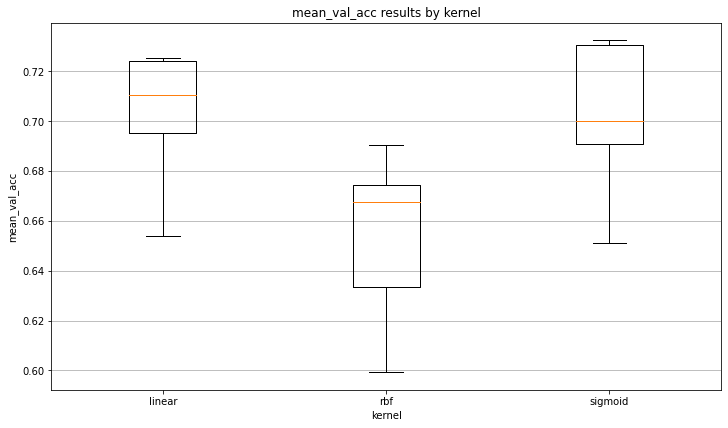

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'kernel':['linear','rbf','sigmoid']},
                                      params2plot=['kernel'])

### Resultados en función del parámetro de penalización

** for this we only consider those configurations where weighting='tfidf'

In [ ]:
results_subset = results_df.loc[results_df['weighting']=='tfidf']

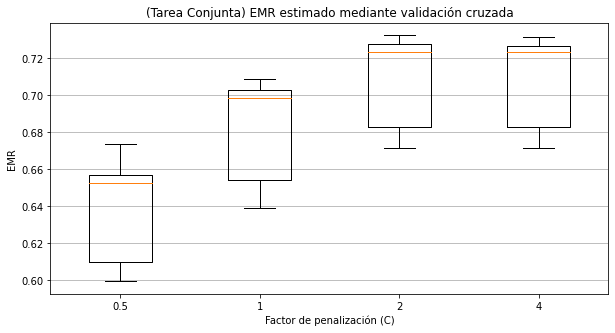

In [ ]:
plotResultsByParameter1(results_subset, 
                        params_dict={'C':[0.5,1,2,4]},
                        params2plot=['C'],
                        size=[10,5],
                        title="(Tarea Conjunta) EMR estimado mediante validación cruzada",
                        x_label="Factor de penalización (C)",
                        y_label="EMR")

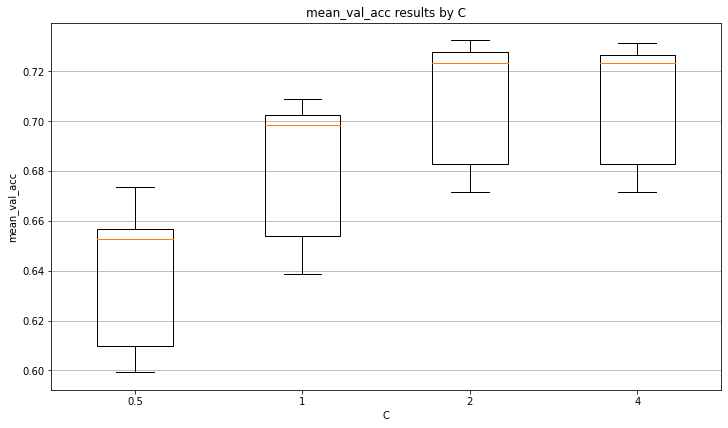

In [ ]:
results_utils.plotResultsByParameter1(results_subset, 
                                      params_dict={'C':[0.5,1,2,4]},
                                      params2plot=['C'])

### Resumen de los resultados (HTA)

* Método de ponderación: TFIDF
* Tipo de kernel: ['linear', 'sigmoid']
* Parámetro de penalización: [**2, 4**]